<a href="https://colab.research.google.com/github/jpan2575/Homework6_Pan/blob/main/Homework_6_Pan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libaries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
from sklearn.linear_model import LinearRegression

#Dataset
url = f"https://downloads.psl.noaa.gov/Datasets/ghcncams/air.mon.mean.nc"
savename = url.split("/")[-1]
urllib.request.urlretrieve(url, savename)

('air.mon.mean.nc', <http.client.HTTPMessage at 0x792c4bb53f50>)

In [ ]:
#Open Dataset
ds = xr.open_dataset(savename)
temp = ds["air"]
lat = ds['lat']
lon = ds['lon']

#Conversion
temp_cel = temp - 273.15

#Time
temp_cel = temp_cel.sel(time=slice("1990-01", "2020-12"))

#Weights
weights = np.cos(np.deg2rad(lat))

#Normalize
weights /= weights.mean()

#Mean
global_mean = temp_cel.mean().values
global_weighted_mean = temp_cel.weighted(weights).mean().values

# Results
print("Global mean temperature (unweighted):", global_mean)
print("Global mean temperature (weighted):", global_weighted_mean)



Global mean temperature (unweighted): 9.379404067993164
Global mean temperature (weighted): 14.050507


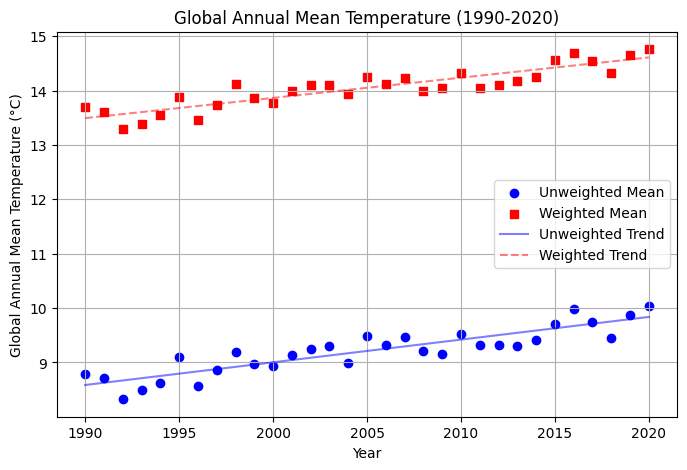

In [ ]:
#Training
years = np.arange(1990, 2021).reshape(-1, 1)

#Models
model1 = LinearRegression().fit(years, annual_mean)
model2 = LinearRegression().fit(years, annual_weighted_mean)
trend1 = model1.predict(years)
trend2 = model2.predict(years)

# Ploting
plt.figure(figsize=(8, 5))
plt.scatter(years, annual_mean, label='Unweighted Mean', color='blue', marker='o')
plt.scatter(years, annual_weighted_mean, label='Weighted Mean', color='red', marker='s')
plt.plot(years, trend1, linestyle='-', color='blue', alpha=0.5, label='Unweighted Trend')
plt.plot(years, trend2, linestyle='--', color='red', alpha=0.5, label='Weighted Trend')

plt.xlabel("Year")
plt.ylabel("Global Annual Mean Temperature (°C)")
plt.title("Global Annual Mean Temperature (1990-2020)")
plt.legend()
plt.grid()
plt.show()


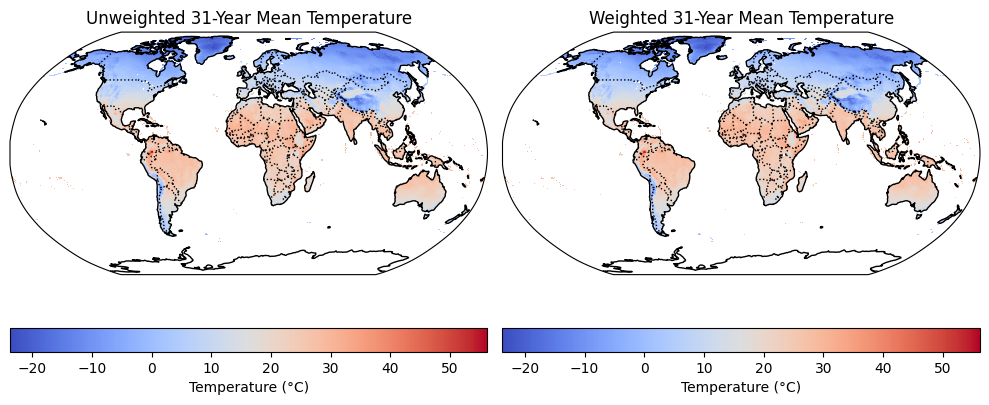

In [106]:
# Compute 31-year mean temperature (unweighted and weighted)
mean_temp_unweighted = temp_cel.mean(dim="time")
mean_temp_weighted = temp_cel.weighted(weights).mean(dim="time")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), subplot_kw={'projection': ccrs.Robinson()})

# Unweighted mean temperature
ax1 = axes[0]
c1 = ax1.pcolormesh(lon, lat, mean_temp_unweighted, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax1.set_title("Unweighted 31-Year Mean Temperature")
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle=':')
fig.colorbar(c1, ax=ax1, orientation='horizontal', fraction=0.05, pad=0.1, label='Temperature (°C)')

# Weighted mean temperature
ax2 = axes[1]
c2 = ax2.pcolormesh(lon, lat, mean_temp_weighted, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax2.set_title("Weighted 31-Year Mean Temperature")
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, linestyle=':')
fig.colorbar(c2, ax=ax2, orientation='horizontal', fraction=0.05, pad=0.1, label='Temperature (°C)')

plt.tight_layout()
plt.show()

